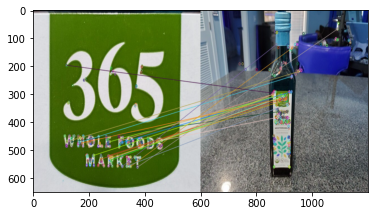

In [5]:
#Feature matching

import numpy as np 
import cv2 
from matplotlib import pyplot as plt
     
#download gambar query di https://i.im.ge/2021/09/24/TCbVi1.png
#download gambar training di https://i.im.ge/2021/09/24/TCbfbf.jpg
# Read the training and query images
query_img = cv2.imread('/content/gambar/TCbkGm.jpg') 
train_img = cv2.imread('/content/gambar/TCbH7r.jpg') 
 
# Convert the images to grayscale 
query_img_gray = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
train_img_gray = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 
 
# Initialize the ORB detector algorithm 
orb = cv2.ORB_create() 
 
# Detect keypoints (features) cand calculate the descriptors
query_keypoints, query_descriptors = orb.detectAndCompute(query_img_gray,None) 
train_keypoints, train_descriptors = orb.detectAndCompute(train_img_gray,None) 
 
# Match the keypoints
matcher = cv2.BFMatcher() 
matches = matcher.match(query_descriptors,train_descriptors) 
 
# Draw the keypoint matches on the output image
output_img = cv2.drawMatches(query_img, query_keypoints, 
train_img, train_keypoints, matches[:20],None) 
 
output_img = cv2.resize(output_img, (1200,650)) 
 
# Save the final image 
cv2.imwrite("feature_matching_result.jpg", output_img) 

# cv.imshow('Feature matching dengan Brute force', output_img)
plt.imshow(output_img),plt.show()

# Close OpenCV upon keypress
cv2.waitKey(0)
cv2.destroyAllWindows()

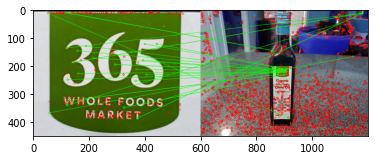

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# img1 = cv2.imread('box.png',0)          # queryImage
# img2 = cv2.imread('box_in_scene.png',0) # trainImage
query_img = cv2.imread('/content/gambar/TCbkGm.jpg') 
train_img = cv2.imread('/content/gambar/TCbH7r.jpg') 

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(query_img,None)
kp2, des2 = sift.detectAndCompute(train_img,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(query_img,kp1,train_img,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()

# Close OpenCV upon keypress
cv2.waitKey(0)
cv2.destroyAllWindows()